###  Brownian Motion Monte Carlo Simulation

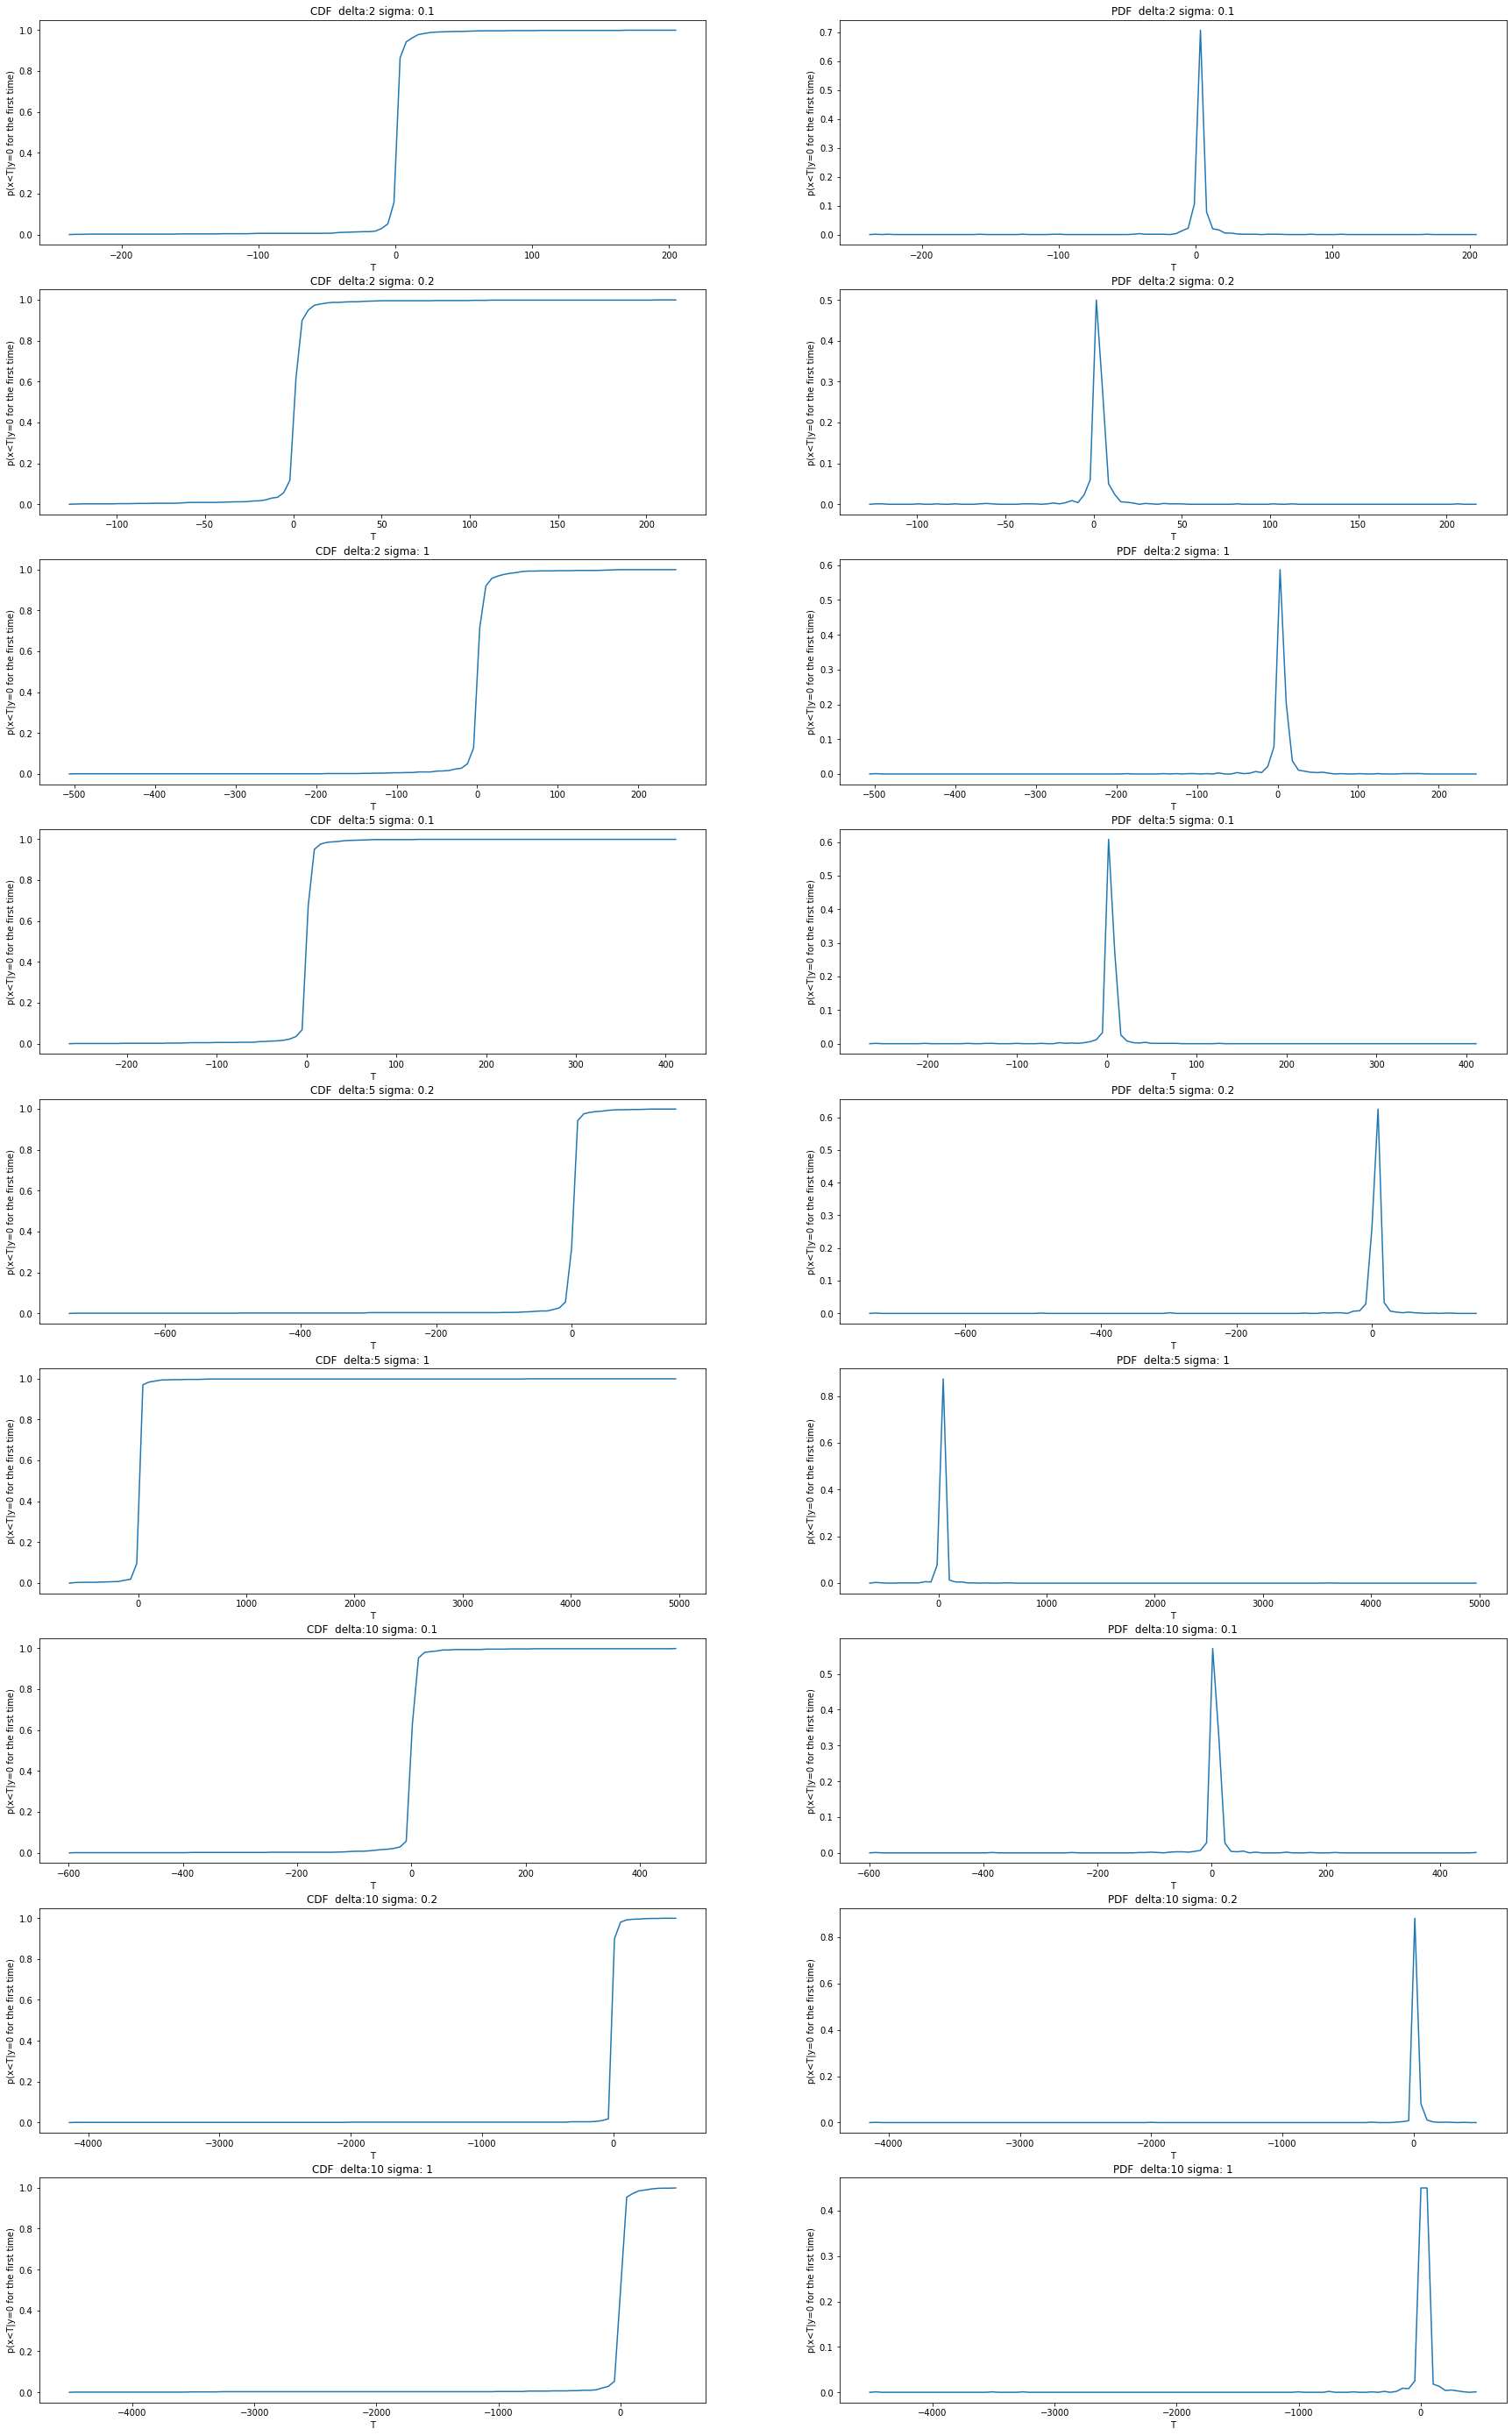

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

np.random.seed(42)
# brownian parameters
mu = 0.0
sigmas = [ 0.1, 0.2, 1]
deltas = [2, 5, 10]  # speed
figure, axes = plt.subplots(nrows=9, ncols=2, figsize=(30, 50))
iter = 0
for delta in deltas:
    for sigma in sigmas:
        N = 1000  # number of simulations
        xs = []
        for i in range(N):
            count = 1
            coords = [[1, 1]]  # start point x = 1, y = 1
            while True:  # till intersection with X axis
                x_old = coords[-1]
                # new coordinates
                x_new = list(np.array(x_old) + (delta * np.random.normal(mu, sigma, size=(2,))))

                if x_new[1] <= 0.0:  # intersection with X axis
                    xs.append(x_new[0])
                    break

                coords.append(x_new)
                count += 1

        Ts = np.linspace(min(xs), max(xs), 100)
        probs = OrderedDict()

        # count probabilities
        # cdf
        probs_cdf = OrderedDict()
        for T in Ts:
            success_rate = [1 if x < T else 0 for x in xs]
            success_prob = sum(success_rate) / len(success_rate)
            probs[T] = success_prob

        # pdf
        pdf_list = [0]
        probs_list = list(probs.values())
        for i in range(len(probs_list) - 1):
            dif = probs_list[i + 1] - probs_list[i]
            pdf_list.append(dif)

        axes[iter,0].plot(Ts, list(probs.values()))
        axes[iter,0].set_xlabel('T')
        axes[iter,0].set_ylabel('p(x<T|y=0 for the first time)')
        axes[iter,0].set_title("CDF  delta:" + str(delta) + " sigma: " + str(sigma))

        axes[iter,1].plot(Ts, pdf_list)
        axes[iter,1].set_title("PDF  delta:" + str(delta) + " sigma: " + str(sigma))
        axes[iter,1].set_xlabel('T')
        axes[iter, 1].set_ylabel('p(x<T|y=0 for the first time)')
        iter += 1
plt.show()


I run simulations for standard brownian motion: 
- I tested different sigma and delta values. In all of the experiments, p(x < T| particles cut y axis first time) is distributed normally around T = 0. This is expected since brownian motion's next step has N(0,t) distribution.
- Increasing delta (speed) and sigma (standard deviation) resulted larger values of T in the experiments. 
- By looking the simulation results it's expected for a particle to cut the x-axis around when x ~= 0
- I also observed that increasing sigma increments the number of iterations till the first cut, since for particles to hit the x axis more iterations will require due to higher variation between next moves. 